In [10]:
import pandas as pd
dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')
dataset.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN


In [15]:
# T값이 nan 값이다.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4650 non-null   int64  
 1   Brand     4650 non-null   object 
 2   Variety   4650 non-null   object 
 3   Style     4650 non-null   object 
 4   Country   4650 non-null   object 
 5   Stars     4648 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 254.4+ KB


In [12]:
dataset.describe()

,Review #,T
count,4650.000000,0.0
mean,2325.500000,NaN
std,1342.483706,NaN
min,1.000000,NaN
25%,1163.250000,NaN
50%,2325.500000,NaN
75%,3487.750000,NaN
max,4650.000000,NaN


In [13]:
print(dataset['Brand'].value_counts())

Nissin             567
Maruchan           182
Myojo              152
Nongshim           136
Samyang Foods      122
                  ... 
Kiseki Foods         1
Xiuhe                1
Dr. McDougall's      1
Hi-Lai Foods         1
Westbrae             1
Name: Brand, Length: 698, dtype: int64


In [14]:
# 고유값 확인 => 중복되지 않는 값!
dataset.nunique()

Review #    4650
Brand        698
Variety     4325
Style         10
Country       54
Stars         53
T              0
dtype: int64

In [16]:
#  총 데이터 셋 4650, 7개의 컬럼

In [19]:
# 결측치 제거
# True = 1 , False = 0
# T 는 4650개 값이 모두 NAN 이고 Stars에 2개 NAN 존재
dataset.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          2
T           4650
dtype: int64

In [20]:
# T값 제거
dataset = dataset.drop('T', axis=1)

In [21]:
# nan  값 2개 있던 stars 제거
dataset = dataset.dropna()

In [22]:
# nan 값이 있는 stars 2개와 T값이 제거된 상태
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4648 non-null   int64 
 1   Brand     4648 non-null   object
 2   Variety   4648 non-null   object
 3   Style     4648 non-null   object
 4   Country   4648 non-null   object
 5   Stars     4648 non-null   object
dtypes: int64(1), object(5)
memory usage: 254.2+ KB


errors: error는 총 3개의 옵션이 존재합니다.

- errors = 'ignore' -> 만약 숫자로 변경할 수 없는 데이터라면 숫자로 변경하지 않고 원본 데이터를 그대로 반환합니다.

- errors = 'coerce' -> 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환합니다.

- errors = 'raise' -> 만약 숫자로 변경할 수 없는 데이터라면 에러를 일으키며 코드를 중단합니다.

In [26]:
# 문자형을 숫자로 변경하는 방법 1. astype 2. to_numeric
# to_numeric은 데이터를 숫자 형식으로 바꿔주는 역할
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4648 non-null   int64  
 1   Brand     4648 non-null   object 
 2   Variety   4648 non-null   object 
 3   Style     4648 non-null   object 
 4   Country   4648 non-null   object 
 5   Stars     4635 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 254.2+ KB


In [28]:
dataset.describe()

,Review #,Stars
count,4648.000000,4635.000000
mean,2324.620267,3.840982
std,1342.096800,6.440785
min,1.000000,0.000000
25%,1162.750000,3.500000
50%,2324.500000,3.750000
75%,3486.250000,4.500000
max,4650.000000,435.000000


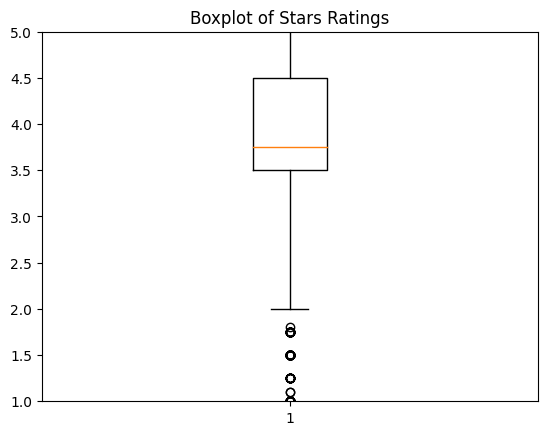

In [31]:
# 인코딩이 필요한 경우 변경
dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')

# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

# NaN 값 제거
dataset = dataset.dropna(subset=['Stars'])

import matplotlib.pyplot as plt

# 'Stars' 컬럼에 대한 박스플롯 생성
plt.boxplot(dataset['Stars'])
plt.title('Boxplot of Stars Ratings')
plt.ylim(1, 5)  # y축 범위를 1에서 5로 설정
plt.show()